In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import layers

In [13]:
test_path = "Fruits_Vegetables/test"
train_path = "Fruits_Vegetables/train" 
validation_path = "Fruits_Vegetables/validation" 

In [2]:
img_w = 180
img_h = 180

In [14]:
data_train = tf.keras.utils.image_dataset_from_directory(
    train_path,
    shuffle = True,
    image_size = (img_w, img_h),
    batch_size = 32,
    validation_split = False
)

Found 3115 files belonging to 36 classes.


In [15]:
data_categories = data_train.class_names

In [16]:
data_val = tf.keras.utils.image_dataset_from_directory(
    validation_path,
    shuffle = True,
    image_size = (img_w, img_h),
    batch_size = 32,
    validation_split = False
)

Found 351 files belonging to 36 classes.


In [18]:
data_test = tf.keras.utils.image_dataset_from_directory(
    test_path,
    shuffle = True,
    image_size = (img_w, img_h),
    batch_size = 32,
    validation_split = False
)

Found 359 files belonging to 36 classes.


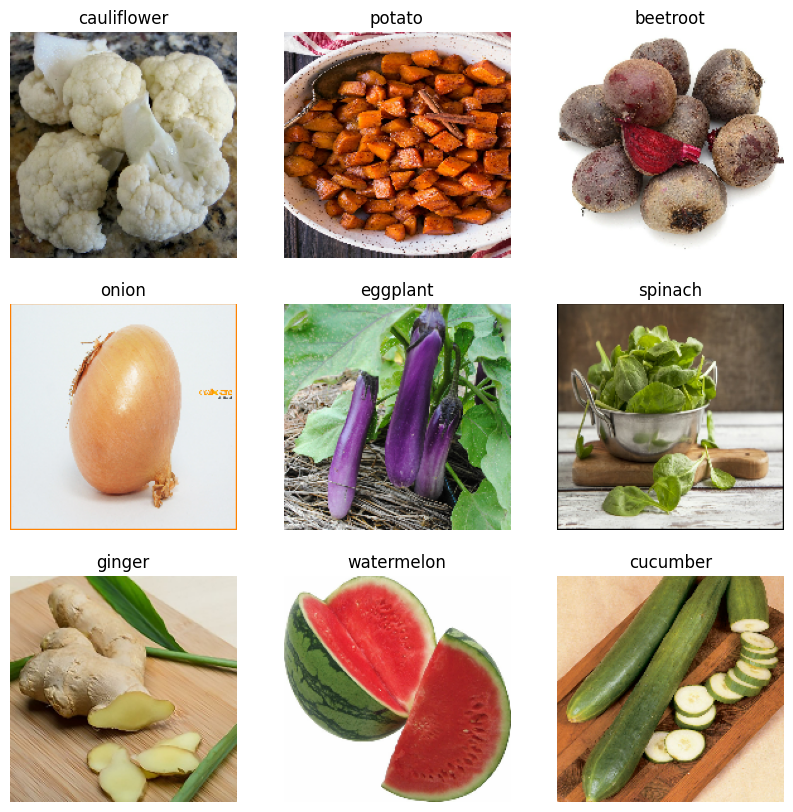

In [30]:
plt.figure(figsize=(10, 10))
for img, label in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(data_categories[label[i]])
        plt.axis('off')

In [35]:
from keras import Sequential
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_categories)) #Length of the Data categories
])

In [36]:
model.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [42]:
history = model.fit(data_train, validation_data=data_val, epochs=20)

Epoch 1/20


AttributeError: 'NoneType' object has no attribute 'items'